In [267]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline


#kayakdata = pd.read_excel('V02Max_Combined.xlsx', sheet_name ='Kayaking')
#athletedata = pd.read_excel('V02Max_Combined.xlsx', sheet_name ='Athletes')
#athletedata
#kayakdata


#Reading the excel files and storing into dataframes
dataset=pd.ExcelFile('V02Max_Combined.xlsx')

Athletes = pd.read_excel(dataset, sheet_name = 'Athletes')
Kayaking = pd.read_excel(dataset, sheet_name = 'Kayaking')
Triathlon = pd.read_excel(dataset, sheet_name = 'Triathlon')
Fencing = pd.read_excel(dataset, sheet_name = 'Fencing')

#Athletes

#Kayaking

combined=pd.concat([Kayaking,Triathlon,Fencing])
#print(combined)

#combined

C:\Users\aravi\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


       ID     time     RR       VO2  power
0      11 -168.600  727.0  0.287147      0
1      11 -167.872  728.0  0.287147      0
2      11 -167.148  724.0  0.287147      0
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[52062 rows x 5 columns]


,ID,time,RR,VO2,power
0,11,-168.600,727.0,0.287147,0
1,11,-167.872,728.0,0.287147,0
2,11,-167.148,724.0,0.287147,0
3,11,-166.484,664.0,0.320580,0
4,11,-165.836,648.0,0.320580,0
...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0
27599,10,943.124,424.0,0.786363,0
27600,10,943.552,428.0,0.786363,0
27601,10,943.976,424.0,0.786363,0


### 1. Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [265]:


#All_sports.to_excel('Allsports.xlsx', sheet_name='Allsports')




### 2. Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [347]:

conditions=[
    (combined['time']<0),
    (combined['time']>0) & (combined['power']>0),
    (combined['power']<=0)
]
choices=['Warm up','Get','Cool down']
combined['stage']=np.select(conditions,choices,default='cool down')
print(combined)                           

       ID     time     RR       VO2  power      stage
0      11 -168.600  727.0  0.287147      0    Warm up
1      11 -167.872  728.0  0.287147      0    Warm up
2      11 -167.148  724.0  0.287147      0    Warm up
3      11 -166.484  664.0  0.320580      0    Warm up
4      11 -165.836  648.0  0.320580      0    Warm up
...    ..      ...    ...       ...    ...        ...
27598  10  942.700  428.0  0.786363      0  Cool down
27599  10  943.124  424.0  0.786363      0  Cool down
27600  10  943.552  428.0  0.786363      0  Cool down
27601  10  943.976  424.0  0.786363      0  Cool down
27602  10  944.404  428.0  0.786363      0  Cool down

[52062 rows x 6 columns]


### 49.Retrieve the row with minimum IBI for fencing athletes using sorting technique.

In [350]:
sorted_data = sorted(Fencing, key=lambda x: x['RR'])
min_ibi_row = sorted_data[0]
print(min_ibi_row)

TypeError: string indices must be integers

### 50.Create a violin chart using any 2 columns in the dataset

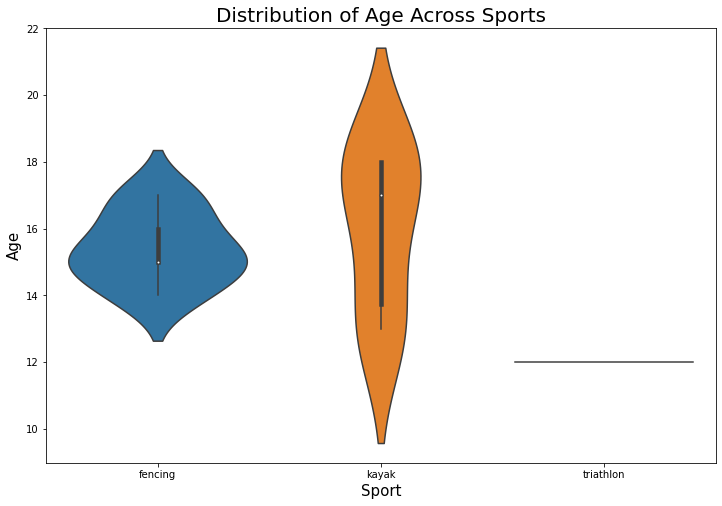

In [269]:
plt.figure(figsize=(12,8))
sns.violinplot(x='sport', y='age', data=Athletes)
#Genderwise distribution of age across sports
#sns.violinplot(x='sport', y='age', data=Athletes, hue='Gender',split=True,palette='Blues')
plt.title("Distribution of Age Across Sports",fontsize=20)
plt.xlabel("Sport",fontsize=15)
plt.ylabel("Age",fontsize=15)
plt.show()

### 51.List every athlete’s V02 ml/kg

In [277]:
# Adding all VO2 values for each athlete
vO2_sum=All_sports.groupby(['ID'])['VO2'].sum()
#print(vO2_sum_df)

#Inner join on VO2sum and athletes based on ID and writing them to a new dataframe
athletenew_df=pd.merge(Athletes,vO2_sum, on='ID', how='inner')[['ID','Weight','sport','VO2']]       
#print(athletenew_df)

 
#Calculating VO2ml/kg for each athlete and writing it to the dataframe
athletenew_df['VO2mlperkg']=(athletenew_df['VO2']/athletenew_df['Weight']).round(2)
#print(athletenew_df)
athletenew_df[['ID','VO2mlperkg']]




,ID,VO2mlperkg
0,1,42.81
1,2,38.63
2,3,69.71
3,4,76.99
4,5,86.74
5,6,71.68
6,7,38.40
7,8,44.82
8,9,49.70
9,10,55.12


### 52.Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

### 53.	phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill

In [79]:
phonebook = {
    "john":938477566,
    "Jack":938377264,
    "Jill":947662781
}

if "Jill" in phonebook:
    print(f'Jill - {phonebook["Jill"]}')
else:
    print("Jill is not listed in the phonebook")

Jill - 947662781


### 54. Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID

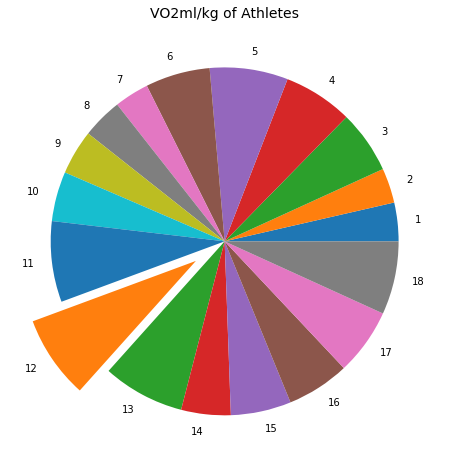

In [270]:
#athletenew_df

# Finding the index of the highest VO2 value
vo2_max_index = athletenew_df['VO2mlperkg'].idxmax()
#print(vo2_max_index) 

# Define explode array with 0.2 for the slice with the maximum VO2
explodes = [0.2 if max == vo2_max_index else 0 for max in range(len(athletenew_df))]

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(athletenew_df['VO2mlperkg'], explode=explodes, labels=athletenew_df['ID'])
plt.title('VO2ml/kg of Athletes', fontsize=14)
plt.show()


### 55. Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate

In [345]:
#60/(RR/1000) will give you Heart rate per minute
tr_heartrate=(60/(Triathlon['RR']/1000)).round(2) ## Calculatin the heart rate from RR value

#Writing the triathlon dataframe to a ne wdataframe and adding the heartrate to the new dataframe
triathlon_new=Triathlon 
triathlon_new['Heartrate']=tr_heartrate

#print(triathlon_new)

#Getting the maximum heartrate of each athlete
hr_id=triathlon_new.groupby(['ID'])['Heartrate'].max()
#print(hr_id)

hr_dict=hr_id.to_dict()
#print(hr_dict)

highhr=0

# finding the highest heartrate from all athletes
for number in hr_id:
    if number>highhr:
        highhr=number
#print(highhr)

#Merging the triathlon_new and athletes table to get the details of the athletes
athlete_tri=pd.merge(triathlon_new,Athletes,on='ID',how='inner')
#print(athlete_tri)

#printing the details of the athlete with the highest heartrate
athlete_det=athlete_tri[(athlete_tri['Heartrate']==highhr)]
#print(f"Athlete ID: {athlete_det['ID']}\n Athlete Name: {athlete_det['First Name']} {athlete_det['Last Name']}\n Age: {athlete_det['age']}\n Gender: {athlete_det['Gender']}\n Weight: {athlete_det['Weight']}\n Height: {athlete_det['Height']}\n Sport: {athlete_det['sport']}\n Heart Rate: {athlete_det['Heartrate']}")
print(newdata[['ID','First Name','Last Name','age','Gender','Weight','Height','Heartrate']])






      ID First Name Last Name  age Gender  Weight  Height  Heartrate
4152  18       Owen     Myers   12   Male    39.7     158     197.37


### 56. Display a histogram to show distribution of athletes by sport.

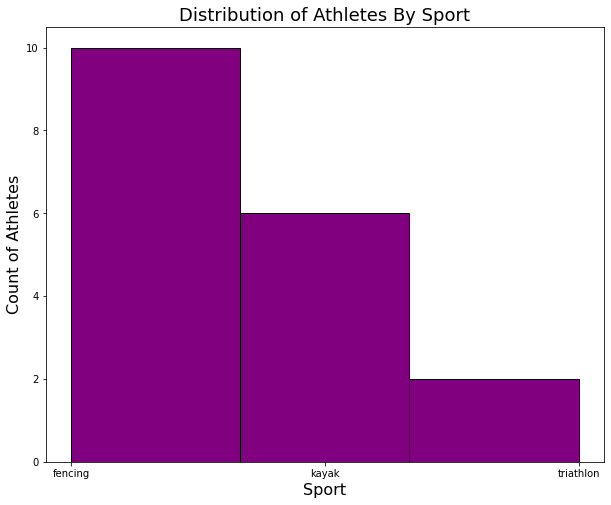

In [271]:
plt.figure(figsize=(10,8))
plt.hist(Athletes['sport'],bins=3,color='purple',edgecolor='black')
plt.xlabel("Sport",fontsize=16)
plt.ylabel("Count of Athletes",fontsize=16)
plt.title("Distribution of Athletes By Sport",fontsize=18)
plt.show()

### 57. Get the first letter of last name of students using for loops and RegEX

In [272]:
Names = ["Olivia Martinez", "Ethan Reynolds", "Jackson Harper", "Liam Sanchez"]

for name in Names:
     #Using regex to match the last name after the blank space
     match = re.search(r'\b(\w+)$', name)
    
     if match:
        # Extracting the first letter of the last name
        first_letter = match.group(1)[0]
        print(f"First letter of last name in '{name}'  is  {first_letter}")
     else:
        print("No last name found")

First letter of last name in 'Olivia Martinez'  is  M
First letter of last name in 'Ethan Reynolds'  is  R
First letter of last name in 'Jackson Harper'  is  H
First letter of last name in 'Liam Sanchez'  is  S


### 58. What is the average % difference in heart rate between warm up and GET for all athletes?

In [390]:
'''
Take the difference between the two values. 
Find the average of two values. Divide the difference value by the average value. 
Multiply by 100 to get the %.

Avg hr of warmup for each athlete. Avg hr of GET for each athlete. difference of these 2 & then %of it
'''

combined_hr=combined
combined_hr['Heart_rate']=(60/(combined['RR']/1000)).round(2)
#print(combined_hr)

hr_avg=pd.DataFrame()
hr_avg['Avg']=(combined_hr.groupby(['ID','stage'])['Heart_rate'].mean()).round(2)
print(hr_avg)
'''
x=[]
for y in hr_avg['ID']:
    if hr_avg['stage']=="Get":
        hr_get=hr_avg['Avg']
    
    if hr_avg['stage']=="Warm up":
        hr_warmup=hr_avg['Avg']
    
    hr_avg['Average']=hr_get-hr_warmup
    
print(hr_avg['Average'])
        

'''


                 Avg
ID stage            
1  Cool down  155.61
   Get        162.52
   Warm up     79.99
   cool down   75.00
2  Cool down  133.22
...              ...
17 cool down   80.65
18 Cool down  139.60
   Get        156.14
   Warm up     71.02
   cool down   84.27

[72 rows x 1 columns]


'\nx=[]\nfor y in hr_avg[\'ID\']:\n    if hr_avg[\'stage\']=="Get":\n        hr_get=hr_avg[\'Avg\']\n    \n    if hr_avg[\'stage\']=="Warm up":\n        hr_warmup=hr_avg[\'Avg\']\n    \n    hr_avg[\'Average\']=hr_get-hr_warmup\n    \nprint(hr_avg[\'Average\'])\n        \n\n'

### 59. Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [338]:
#Athletes
#athletenew_df

athlete_merge=pd.merge(Athletes,athletenew_df, on='ID', how='inner')[['ID','First Name','Last Name','Height','sport','VO2mlperkg']]
#print(athlete_merge)


# Finding the index of the tallest athlete
tallathlete_index = athlete_merge['Height'].idxmax()

# Getting details of the tallest athlete
tallest_athlete = athlete_merge.loc[tallathlete_index]

#print(f"Athlete ID: {tallest_athlete['ID']} \nName: {tallest_athlete['First Name']} {tallest_athlete['Last Name']}\nHeight: {tallest_athlete['Height']}\nVO2ml/kg:{tallest_athlete['VO2mlperkg']}\n sport: {tallest_athlete['sport']}" )

print(f"Athlete ID: {tallest_athlete['ID']} \nName: {tallest_athlete['First Name']} {tallest_athlete['Last Name']}\nHeight: {tallest_athlete['Height']}\nVO2ml/kg:{tallest_athlete['VO2mlperkg']}" )

KeyError: "['sport'] not in index"

### 60. Get the last letter of athletes last names using RegEX .

In [273]:
last_letter = [] # Initializing an empty list to store the last letters of the last names

# Using for loop to iterate over the list of  names
for last_name in Athletes['Last Name']:
    # Extracting the last letter using regex
    match = re.search(r'(\w)\b$', last_name)
    if match:
        last_letter.append(match.group(1))
print(f"Last Names are : \n {Athletes['Last Name']}")
print(f" Last Letters in Last Names are {last_letter}")


Last Names are : 
 0      Martinez
1      Reynolds
2        Harper
3       Sanchez
4      Thompson
5     Rodriguez
6       Simmons
7       Bennett
8         Price
9        Jordan
10      Griffin
11        Dixon
12    Carpenter
13     Mitchell
14      Wallace
15     Anderson
16       Foster
17        Myers
Name: Last Name, dtype: object
 Last Letters in Last Names are ['z', 's', 'r', 'z', 'n', 'z', 's', 't', 'e', 'n', 'n', 'n', 'r', 'l', 'e', 'n', 'r', 's']


### 61. Reverse an arrays order in Python. You can use any array with any values you like.

In [80]:
numbers=[10,20,30,40,50,60,70]
print(numbers[::-1]) #printing in reverse order using negative index        

[70, 60, 50, 40, 30, 20, 10]


### 62. What is the root mean of successive differences for 30 consecutive minutes for each athlete.

,ID,time,RR,VO2,power,stage
0,11,-168.600,727.0,0.287147,0,Warm up
1,11,-167.872,728.0,0.287147,0,Warm up
2,11,-167.148,724.0,0.287147,0,Warm up
3,11,-166.484,664.0,0.320580,0,Warm up
4,11,-165.836,648.0,0.320580,0,Warm up
...,...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0,Cool down
27599,10,943.124,424.0,0.786363,0,Cool down
27600,10,943.552,428.0,0.786363,0,Cool down
27601,10,943.976,424.0,0.786363,0,Cool down


### 63. On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

In [244]:
#60/(RR/1000) will give you Heart rate per minute
heartrate=(60/(Fencing['RR']/1000)).round(2)
fencing_new=Fencing

fencing_new['Heartrate']=heartrate
fencing_new


if fencing_new['Heartrate']>155:
    zone5=fencing_new['time']

        Athletes['Max_HR']=220-Athletes['age']
    #zone5=fencing_new[['ID','time']]

zone5

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### 64. Count athletes based on Gender using count plot

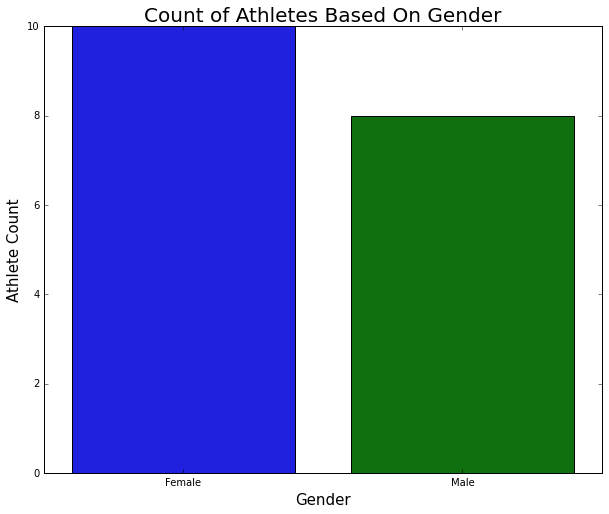

In [85]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=Athletes)
plt.title("Count of Athletes Based On Gender",fontsize=20)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Athlete Count",fontsize=15)
plt.show()